<a href="https://colab.research.google.com/github/MarynaMarkova/TensorFlow_Coursera/blob/main/Cats%26Dogs_Augmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Augmentation


# Baseline Performance

In [1]:
!wget https://storage.googleapis.com/tensorflow-1-public/course2/cats_and_dogs_filtered.zip

--2023-07-16 17:42:37--  https://storage.googleapis.com/tensorflow-1-public/course2/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.13.128, 74.125.26.128, 172.217.193.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.13.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘cats_and_dogs_filtered.zip’

cats_and_dogs_filte 100%[===================>]  65.43M   176MB/s    in 0.4s    

2023-07-16 17:42:38 (176 MB/s) - ‘cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [2]:
import os
import zipfile

# Extract the archive
zip_ref = zipfile.ZipFile("./cats_and_dogs_filtered.zip", 'r')
zip_ref.extractall("tmp/")
zip_ref.close()

# Assign training and validation set directories
base_dir = 'tmp/cats_and_dogs_filtered'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

# Directory with training cat pictures
train_cats_dir = os.path.join(train_dir, 'cats')

# Directory with training dog pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')

# Directory with validation cat pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')

# Directory with validation dog pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

In [3]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop

def create_model():
  '''Creates a CNN with 4 convolutional layers'''
  model = tf.keras.models.Sequential([
      tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
      tf.keras.layers.MaxPooling2D(2, 2),
      tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
      tf.keras.layers.MaxPooling2D(2,2),
      tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
      tf.keras.layers.MaxPooling2D(2,2),
      tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
      tf.keras.layers.MaxPooling2D(2,2),
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(512, activation='relu'),
      tf.keras.layers.Dense(1, activation='sigmoid')
  ])

  model.compile(loss='binary_crossentropy',
                optimizer=RMSprop(learning_rate=1e-4),
                metrics=['accuracy'])

  return model

In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        train_dir,  # This is the source directory for training images
        target_size=(150, 150),  # All images will be resized to 150x150
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

# Flow validation images in batches of 20 using test_datagen generator
validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [5]:
# Constant for epochs
EPOCHS = 20

# Create a new model
model = create_model()

# Train the model
history = model.fit(
      train_generator,
      steps_per_epoch=100,  # 2000 images = batch_size * steps
      epochs=EPOCHS,
      validation_data=validation_generator,
      validation_steps=50,  # 1000 images = batch_size * steps
      verbose=2)

Epoch 1/20
100/100 - 148s - loss: 0.6926 - accuracy: 0.5210 - val_loss: 0.6844 - val_accuracy: 0.5010 - 148s/epoch - 1s/step
Epoch 2/20
100/100 - 134s - loss: 0.6801 - accuracy: 0.5785 - val_loss: 0.6659 - val_accuracy: 0.6320 - 134s/epoch - 1s/step
Epoch 3/20
100/100 - 127s - loss: 0.6530 - accuracy: 0.6090 - val_loss: 0.7384 - val_accuracy: 0.5030 - 127s/epoch - 1s/step
Epoch 4/20
100/100 - 127s - loss: 0.6140 - accuracy: 0.6610 - val_loss: 0.6327 - val_accuracy: 0.6540 - 127s/epoch - 1s/step
Epoch 5/20
100/100 - 126s - loss: 0.5858 - accuracy: 0.7030 - val_loss: 0.7203 - val_accuracy: 0.6040 - 126s/epoch - 1s/step
Epoch 6/20
100/100 - 131s - loss: 0.5680 - accuracy: 0.7070 - val_loss: 0.5854 - val_accuracy: 0.6930 - 131s/epoch - 1s/step
Epoch 7/20
100/100 - 131s - loss: 0.5392 - accuracy: 0.7285 - val_loss: 0.5729 - val_accuracy: 0.6990 - 131s/epoch - 1s/step
Epoch 8/20
100/100 - 131s - loss: 0.5242 - accuracy: 0.7375 - val_loss: 0.5719 - val_accuracy: 0.7110 - 131s/epoch - 1s/step


In [6]:
import matplotlib.pyplot as plt

def plot_loss_acc(history):
  '''Plots the training and validation loss and accuracy from a history object'''
  acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  epochs = range(len(acc))

  plt.plot(epochs, acc, 'bo', label='Training accuracy')
  plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
  plt.title('Training and validation accuracy')

  plt.figure()

  plt.plot(epochs, loss, 'bo', label='Training Loss')
  plt.plot(epochs, val_loss, 'b', label='Validation Loss')
  plt.title('Training and validation loss')
  plt.legend()

  plt.show()

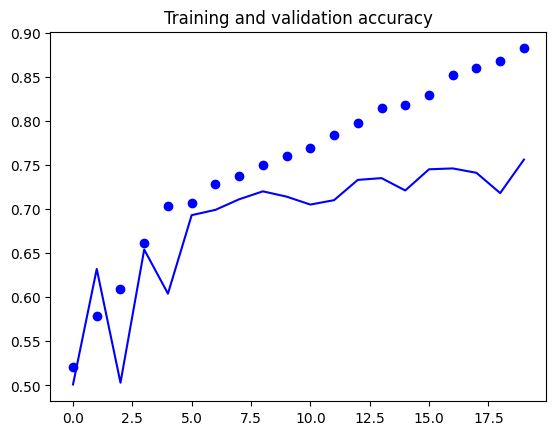

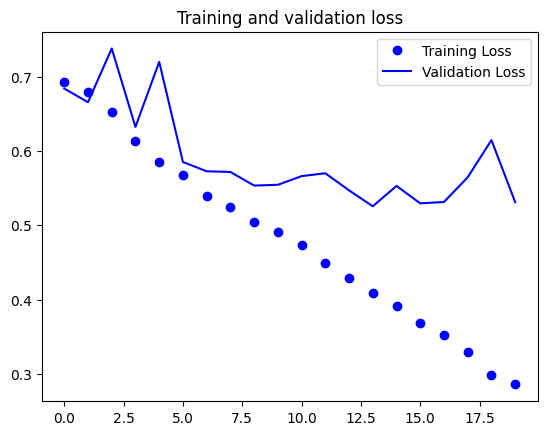

In [7]:
# Plot training results
plot_loss_acc(history)

# Data Augmentation

In [8]:
# Create new model
model_for_aug = create_model()

# This code has changed. Now instead of the ImageGenerator just rescaling
# the image, we also rotate and do other operations
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        train_dir,  # This is the source directory for training images
        target_size=(150, 150),  # All images will be resized to 150x150
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

# Flow validation images in batches of 20 using test_datagen generator
validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

# Train the new model
history_with_aug = model_for_aug.fit(
      train_generator,
      steps_per_epoch=100,  # 2000 images = batch_size * steps
      epochs=EPOCHS,
      validation_data=validation_generator,
      validation_steps=50,  # 1000 images = batch_size * steps
      verbose=2)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/20
100/100 - 145s - loss: 0.6935 - accuracy: 0.5090 - val_loss: 0.6837 - val_accuracy: 0.5810 - 145s/epoch - 1s/step
Epoch 2/20
100/100 - 134s - loss: 0.6854 - accuracy: 0.5440 - val_loss: 0.6680 - val_accuracy: 0.5870 - 134s/epoch - 1s/step
Epoch 3/20
100/100 - 139s - loss: 0.6764 - accuracy: 0.5585 - val_loss: 0.6592 - val_accuracy: 0.5990 - 139s/epoch - 1s/step
Epoch 4/20
100/100 - 134s - loss: 0.6665 - accuracy: 0.5850 - val_loss: 0.6467 - val_accuracy: 0.6040 - 134s/epoch - 1s/step
Epoch 5/20
100/100 - 139s - loss: 0.6573 - accuracy: 0.5945 - val_loss: 0.6406 - val_accuracy: 0.6070 - 139s/epoch - 1s/step
Epoch 6/20
100/100 - 139s - loss: 0.6443 - accuracy: 0.6305 - val_loss: 0.6068 - val_accuracy: 0.6560 - 139s/epoch - 1s/step
Epoch 7/20
100/100 - 138s - loss: 0.6285 - accuracy: 0.6455 - val_loss: 0.5878 - val_accuracy: 0.6890 - 138s/epoch - 1s/step
Epoch 8/20
100/100 - 134s - loss: 0.6197 

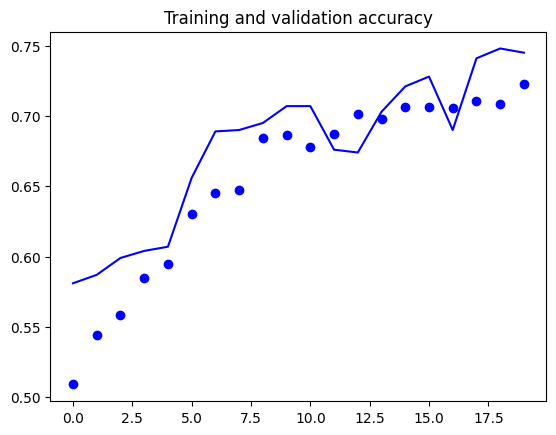

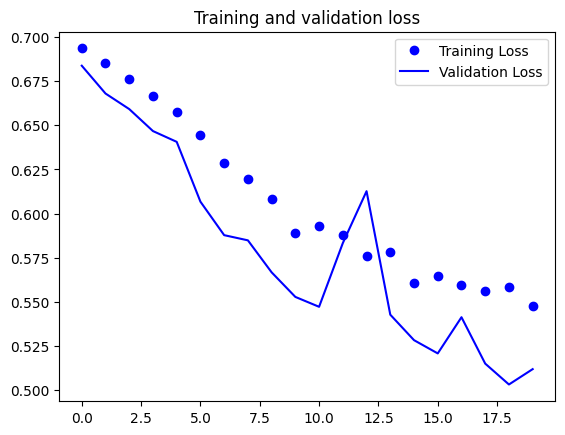

In [9]:
# Plot the results of training with data augmentation
plot_loss_acc(history_with_aug)